### 0. 데이터 준비

In [1]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [3]:
df.shape

(202772, 12)

In [4]:
df_age = df[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 7)

In [5]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_63785/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


In [6]:
df_v1 = df_age[df_age['품목대분류'] == '생활용품']
df_v1['품목대분류'].unique()

array(['생활용품'], dtype=object)

In [7]:
df_v1.shape #1735건

(2441, 7)

In [8]:
df_v1 = df_v1[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소']]
df_v1.head()

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
12889,여자,70-74,파열·파손·꺾여짐,열상(찢어짐),(부위)손가락,주택 - 화장실/욕실
12890,남자,40-44,파열·파손·꺾여짐,열상(찢어짐),(부위)기타 얼굴부위,주택 - 화장실/욕실
12891,여자,35-39,기타 물리적 충격,절상(베임),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",주택 - 화장실/욕실
12892,남자,15-19,파열·파손·꺾여짐,절상(베임),(부위)손목,주택 - 화장실/욕실
12893,여자,45-49,파열·파손·꺾여짐,열상(찢어짐),(부위)손가락,주택 - 화장실/욕실


## 1. 빈발항목 분석

In [9]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
df_encoded.shape

(2441, 174)

In [11]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

여자                           1213
남자                           1212
0-4                           794
체내 위험 이물질                     777
주택 - 화장실/욕실                   755
(부위)신체내부-소화계통(식도,위장,대장 등)     629
주택 - 거실                       584
열상(찢어짐)                       525
이물질(액체류)                      495
(부위)안구                        491
dtype: int64

In [12]:
sort_sum = pd.DataFrame(df_encoded.sum().sort_values(ascending=False)).iloc[:17].T

sort_sum = sort_sum.astype(float)

new_row = {}
for column in sort_sum.columns:
    new_row[column] = sort_sum.iloc[0][column] / df_v1.shape[0]

pd.concat([sort_sum, pd.DataFrame(new_row, index=[0])], ignore_index=True)

,여자,남자,0-4,체내 위험 이물질,주택 - 화장실/욕실,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실,열상(찢어짐),이물질(액체류),(부위)안구,주택 - 침실/방,예리함·마감처리 불량,결막염 또는 안구손상,이물질(금속),5-9,이물질(기타),(부위)손가락
0,1213.000000,1212.000000,794.000000,777.000000,755.000000,629.000000,584.000000,525.000000,495.000000,491.000000,410.000000,363.00000,343.000000,333.00000,278.000000,271.00000,224.000000
1,0.496927,0.496518,0.325277,0.318312,0.309299,0.257681,0.239246,0.215076,0.202786,0.201147,0.167964,0.14871,0.140516,0.13642,0.113888,0.11102,0.091766


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font 

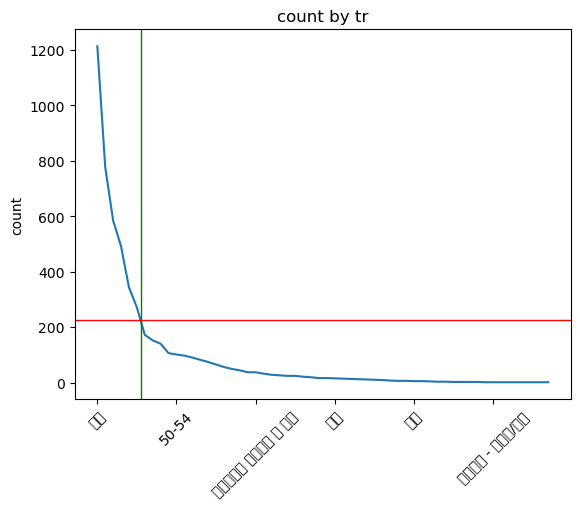

In [13]:
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

df_encoded.sum().sort_values(ascending=False)[::3].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)
#plt.ylim(0,30000)
#plt.xlim(0,100)

plt.axvline(x=5.5, color='g', linewidth=1)
plt.axhline(y=224, color='r', linewidth=1)

plt.show()
# 10%(17.4/174)의 항목(17. 내림처리) 11.6%발생

In [14]:
pd.concat([sort_sum, pd.DataFrame(new_row, index=[0])], ignore_index=True)

,여자,남자,0-4,체내 위험 이물질,주택 - 화장실/욕실,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실,열상(찢어짐),이물질(액체류),(부위)안구,주택 - 침실/방,예리함·마감처리 불량,결막염 또는 안구손상,이물질(금속),5-9,이물질(기타),(부위)손가락
0,1213.000000,1212.000000,794.000000,777.000000,755.000000,629.000000,584.000000,525.000000,495.000000,491.000000,410.000000,363.00000,343.000000,333.00000,278.000000,271.00000,224.000000
1,0.496927,0.496518,0.325277,0.318312,0.309299,0.257681,0.239246,0.215076,0.202786,0.201147,0.167964,0.14871,0.140516,0.13642,0.113888,0.11102,0.091766


- 여자한테 2배정도 많은 사고가 발생함. 

(예상 가능)
- 주택-침실/방에서 많이 발생함. 집에서 옷이나 장신구를 착용하기 때문이 아닐까 예상됨.

(주의+예상불가능)
- 체내 위험 이물질 관련 사고 발생이 많음. 
- 귀 및 고막 사고가 많음. 귀걸이와 같은 장신구 관련 사고가 많은 것이 아닐까 예상됨. 특히 이물질(금속) 등 장신구에 관한 항목이 많이 나타나는 것을 보아 날카롭고 단단한 장신구 관련 사고가 많은 것 같음.> 마지막에 살펴보기로.
- 0-4세의 사고가 많음. > 마지막에 살펴봐야함.

In [15]:
# 최소 및 최대 지지도 설정
min_support = 0.1
#max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
#frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.head()

,support,itemsets
0,0.496927,(여자)
1,0.309299,(주택 - 화장실/욕실)
2,0.215076,(열상(찢어짐))
3,0.496518,(남자)
4,0.325277,(0-4)


In [16]:
frequent_itemsets.sort_values(by='support', ascending=False).head(35)

,support,itemsets
0,0.496927,(여자)
3,0.496518,(남자)
4,0.325277,(0-4)
5,0.318312,(체내 위험 이물질)
1,0.309299,(주택 - 화장실/욕실)
6,0.257681,"((부위)신체내부-소화계통(식도,위장,대장 등))"
12,0.239246,(주택 - 거실 )
24,0.220811,"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))"
2,0.215076,(열상(찢어짐))
15,0.202786,(이물질(액체류))


In [17]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.496927,(여자),1
1,0.309299,(주택 - 화장실/욕실),1
2,0.215076,(열상(찢어짐)),1
3,0.496518,(남자),1
4,0.325277,(0-4),1


In [18]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2.head()

,support,itemsets,length
16,0.176567,"(주택 - 화장실/욕실, 여자)",2
17,0.132732,"(주택 - 화장실/욕실, 남자)",2
18,0.132323,"(열상(찢어짐), 남자)",2
19,0.185580,"(남자, 0-4)",2
20,0.139697,"(여자, 0-4)",2


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

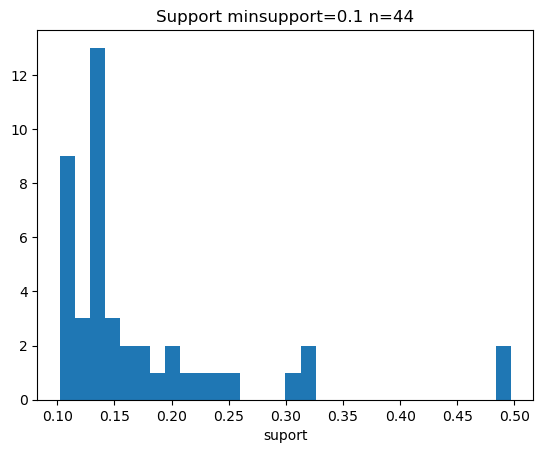

In [19]:
# 2건 이상 항목집합의 지지도 분포 (히스토그램)
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsupport={min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

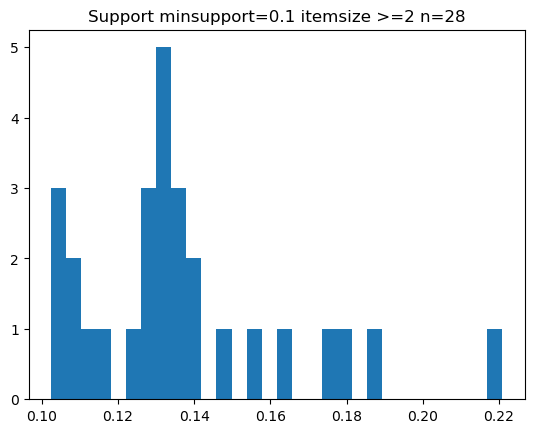

In [20]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'Support minsupport={min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

In [21]:
freq_its_2[freq_its_2.support >= 0.20].sort_values(by='support', ascending=False)

,support,itemsets,length
24,0.220811,"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",2


----

## 2. 연관규칙 분석

In [22]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,(결막염 또는 안구손상),((부위)안구),0.140516,0.201147,0.137239,0.976676,4.855534,0.108974,34.250819,0.923868
32,"(이물질(금속), (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.131094,0.318312,0.127407,0.971875,3.053213,0.085678,24.237790,0.773934
27,(이물질(금속)),(체내 위험 이물질),0.136420,0.318312,0.132323,0.969970,3.047229,0.088899,22.700205,0.777962
30,"(체내 위험 이물질, 이물질(금속))","((부위)신체내부-소화계통(식도,위장,대장 등))",0.132323,0.257681,0.127407,0.962848,3.736586,0.093310,19.980746,0.844065
28,(이물질(금속)),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.257681,0.131094,0.960961,3.729262,0.095941,19.014780,0.847461
33,(이물질(금속)),"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.220811,0.127407,0.933934,4.229560,0.097284,11.794086,0.884189
12,"(남자, (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.154445,0.318312,0.136010,0.880637,2.766582,0.086848,5.711029,0.755176
16,"(0-4, (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.129045,0.318312,0.111020,0.860317,2.702748,0.069943,4.880265,0.723351
7,"((부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.257681,0.318312,0.220811,0.856916,2.692061,0.138788,4.764241,0.846722
10,"(체내 위험 이물질, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.180254,0.257681,0.136010,0.754545,2.928212,0.089562,3.024261,0.803291


----

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

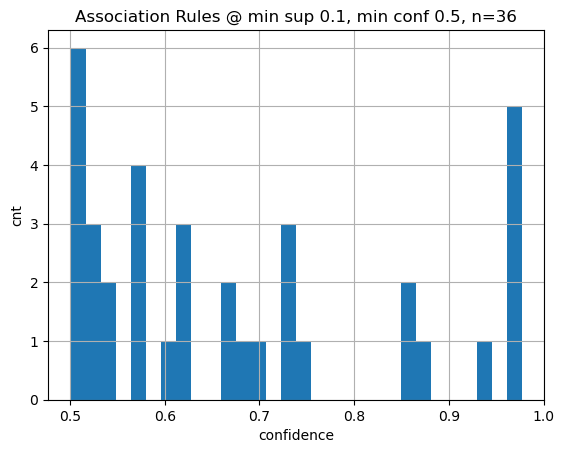

In [23]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

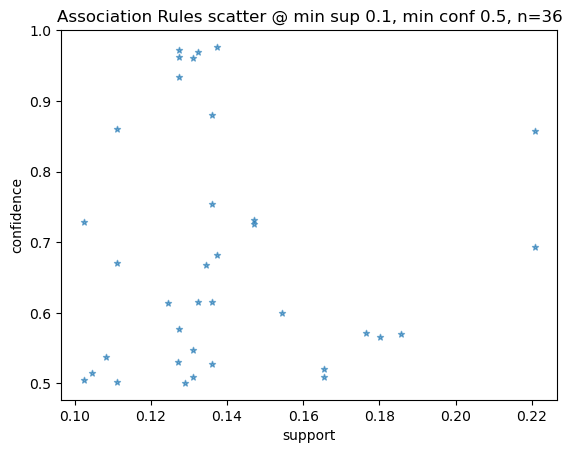

In [24]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

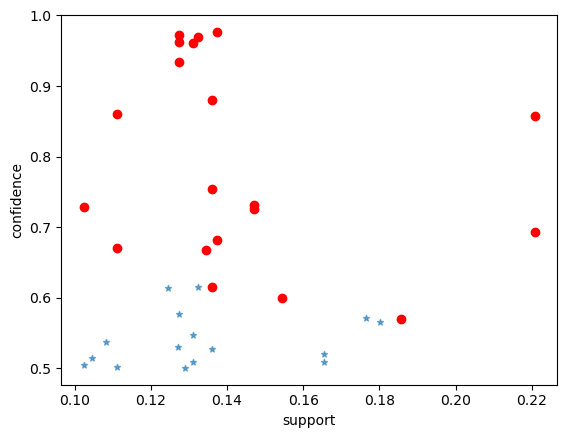

In [25]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
#plt.title('Association Rules scatter @ min sup 0.02, min conf 0.5, n=826')

# 상위 20개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [26]:
top_20_rules  #[48, 42, 71, 66, 23, 52]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
22,(결막염 또는 안구손상),((부위)안구),0.140516,0.201147,0.137239,0.976676,4.855534,0.108974,34.250819,0.923868,1.113915
27,(이물질(금속)),(체내 위험 이물질),0.136420,0.318312,0.132323,0.969970,3.047229,0.088899,22.700205,0.777962,1.102293
32,"(이물질(금속), (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.131094,0.318312,0.127407,0.971875,3.053213,0.085678,24.237790,0.773934,1.099282
28,(이물질(금속)),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.257681,0.131094,0.960961,3.729262,0.095941,19.014780,0.847461,1.092055
30,"(체내 위험 이물질, 이물질(금속))","((부위)신체내부-소화계통(식도,위장,대장 등))",0.132323,0.257681,0.127407,0.962848,3.736586,0.093310,19.980746,0.844065,1.090255
7,"((부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.257681,0.318312,0.220811,0.856916,2.692061,0.138788,4.764241,0.846722,1.077727
33,(이물질(금속)),"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.220811,0.127407,0.933934,4.229560,0.097284,11.794086,0.884189,1.061341
12,"(남자, (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.154445,0.318312,0.136010,0.880637,2.766582,0.086848,5.711029,0.755176,1.016646
16,"(0-4, (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.129045,0.318312,0.111020,0.860317,2.702748,0.069943,4.880265,0.723351,0.971338
6,(체내 위험 이물질),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.318312,0.257681,0.220811,0.693694,2.692061,0.138788,2.423452,0.922031,0.914505


In [27]:
indices_to_drop = [21, 27, 17, 2, 8, 12]
top_10_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)
top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(결막염 또는 안구손상),((부위)안구),0.140516,0.201147,0.137239,0.976676,4.855534,0.108974,34.250819,0.923868,1.113915
1,"(이물질(금속), (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.131094,0.318312,0.127407,0.971875,3.053213,0.085678,24.237790,0.773934,1.099282
2,(이물질(금속)),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.257681,0.131094,0.960961,3.729262,0.095941,19.014780,0.847461,1.092055
3,"(체내 위험 이물질, 이물질(금속))","((부위)신체내부-소화계통(식도,위장,대장 등))",0.132323,0.257681,0.127407,0.962848,3.736586,0.093310,19.980746,0.844065,1.090255
4,"((부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.257681,0.318312,0.220811,0.856916,2.692061,0.138788,4.764241,0.846722,1.077727
5,(이물질(금속)),"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.220811,0.127407,0.933934,4.229560,0.097284,11.794086,0.884189,1.061341
6,"(0-4, (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.129045,0.318312,0.111020,0.860317,2.702748,0.069943,4.880265,0.723351,0.971338
7,(체내 위험 이물질),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.318312,0.257681,0.220811,0.693694,2.692061,0.138788,2.423452,0.922031,0.914505
8,"(체내 위험 이물질, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.180254,0.257681,0.136010,0.754545,2.928212,0.089562,3.024261,0.803291,0.890555
9,((부위)안구),(이물질(액체류)),0.201147,0.202786,0.147071,0.731161,3.605583,0.106281,2.965395,0.904613,0.878232


In [28]:
top_10_rules = top_10_rules.sort_values(by='confidence', ascending=False)
top_10_rules.head(11)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(결막염 또는 안구손상),((부위)안구),0.140516,0.201147,0.137239,0.976676,4.855534,0.108974,34.250819,0.923868,1.113915
1,"(이물질(금속), (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.131094,0.318312,0.127407,0.971875,3.053213,0.085678,24.237790,0.773934,1.099282
3,"(체내 위험 이물질, 이물질(금속))","((부위)신체내부-소화계통(식도,위장,대장 등))",0.132323,0.257681,0.127407,0.962848,3.736586,0.093310,19.980746,0.844065,1.090255
2,(이물질(금속)),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.257681,0.131094,0.960961,3.729262,0.095941,19.014780,0.847461,1.092055
5,(이물질(금속)),"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",0.136420,0.220811,0.127407,0.933934,4.229560,0.097284,11.794086,0.884189,1.061341
6,"(0-4, (부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.129045,0.318312,0.111020,0.860317,2.702748,0.069943,4.880265,0.723351,0.971338
4,"((부위)신체내부-소화계통(식도,위장,대장 등))",(체내 위험 이물질),0.257681,0.318312,0.220811,0.856916,2.692061,0.138788,4.764241,0.846722,1.077727
8,"(체내 위험 이물질, 남자)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.180254,0.257681,0.136010,0.754545,2.928212,0.089562,3.024261,0.803291,0.890555
9,((부위)안구),(이물질(액체류)),0.201147,0.202786,0.147071,0.731161,3.605583,0.106281,2.965395,0.904613,0.878232
11,(결막염 또는 안구손상),(이물질(액체류)),0.140516,0.202786,0.102417,0.728863,3.594252,0.073922,2.940263,0.839781,0.831280


## 3. top 9 분포 확인

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

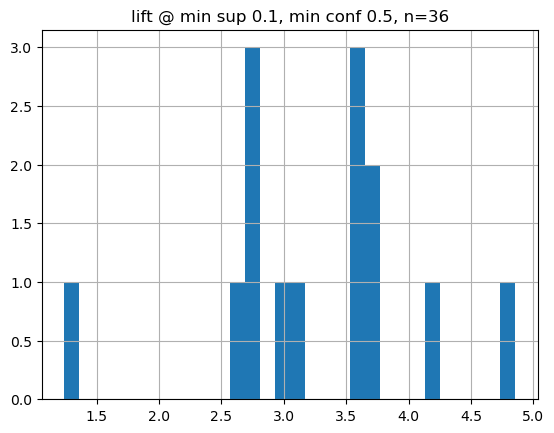

In [29]:
# 향상도 관찰
# 연관규칙의 향상도 분포
top_10_rules.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [30]:
#rules_conf[rules_conf['lift']<1.0]

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

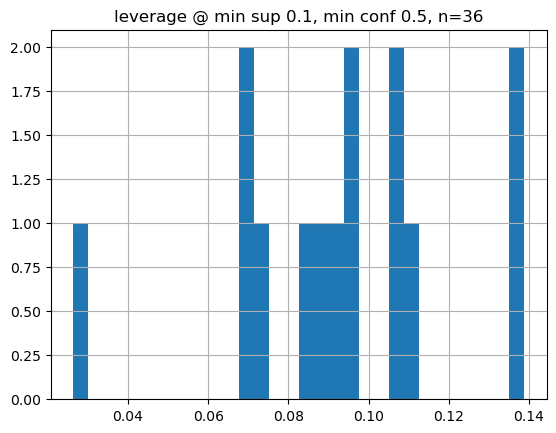

In [31]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
top_10_rules.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

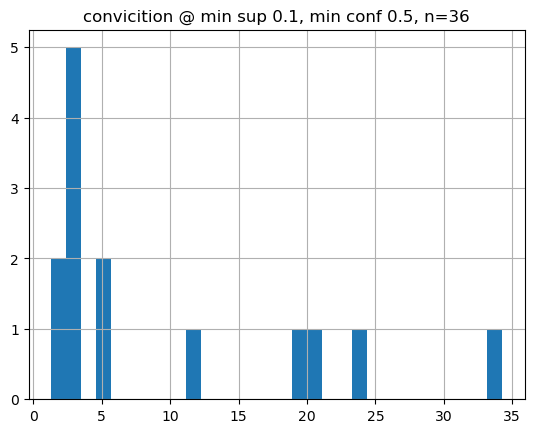

In [32]:
# 확신 관찰
# 연관규칙의 확신 분포
top_10_rules.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 없음!!

In [33]:
bouns = df[(df['품목대분류']=='생활용품')&(df['위해부위']=='(부위)신체내부-소화계통(식도,위장,대장 등)')]
bouns['품목'].value_counts() / bouns.shape[0]

품목
동전 및 화폐                    0.484897
칫솔 및 구강세척용품(치실, 치간칫솔 등)    0.109698
표백제                        0.066773
방습제                        0.066773
기타 가정용 청소 및 세탁용품           0.041335
단추                         0.038156
세숫비누                       0.033386
액체형 세탁제                    0.019078
기타 해충퇴치 제품(전기 모기채 등)       0.014308
변기세정제 및 세척제                0.014308
기타 방향제                     0.011129
퀼트핀                        0.011129
캡슐형 세탁제                    0.011129
범용 세척제                     0.009539
지퍼                         0.007949
빨래집게                       0.006359
바느질바늘                      0.004769
탈취제                        0.004769
보냉제                        0.004769
기타 세탁제                     0.003180
가루형 세탁제                    0.003180
기타 침구 및 매트                 0.003180
기타 생활용품                    0.003180
물티슈                        0.003180
헹굼제                        0.003180
가정용 소독제                    0.003180
방석                         0.001590
베개                       

In [34]:
bouns[bouns['품목']=='동전 및 화폐']['연령대분류'].value_counts()

연령대분류
유아     186
어린이    117
청소년      2
Name: count, dtype: int64

In [35]:
bouns = df[(df['품목대분류']=='생활용품')&(df['위해부위']=='(부위)안구')]
bouns['품목중분류'].value_counts()

품목중분류
가정용 청소 및 세탁용품         405
기타 생활용품                27
가정용 욕실용품               19
가정용 난방·환기용품            16
커튼 블라인드 및 창문용 액세서리      8
수건 주방용 천 및 액세서리         6
침구 및 매트                 5
바느질 용품                  5
Name: count, dtype: int64

In [36]:
bouns['연령대분류'].value_counts()

연령대분류
성인     260
청년     108
유아      54
노인      48
어린이     13
청소년      8
Name: count, dtype: int64

In [37]:
bouns = df[(df['품목대분류']=='생활용품')&(df['위해부위']=='(부위)안구')&(df['연령대분류']=='성인')]
bouns

,성별,범주형 나이,연령대분류,범주형 발생일,요일,위해원인,위해증상,위해부위,발생장소,품목대분류,품목중분류,품목
12931,여자,45-49,성인,20201001-10,금요일,이물질(기타),결막염 또는 안구손상,(부위)안구,주택 - 주방,생활용품,가정용 욕실용품,"칫솔 및 구강세척용품(치실, 치간칫솔 등)"
12956,남자,50-54,성인,20200701-10,수요일,부딪힘,결막염 또는 안구손상,(부위)안구,주택 - 화장실/욕실,생활용품,가정용 욕실용품,수건 걸대
13055,여자,45-49,성인,20201101-10,토요일,이물질(액체류),결막염 또는 안구손상,(부위)안구,주택 - 베란다(발코니),생활용품,가정용 청소 및 세탁용품,액체형 세탁제
13062,남자,35-39,성인,20200101-10,목요일,이물질(액체류),체내 위험 이물질,(부위)안구,주택 - 거실,생활용품,가정용 청소 및 세탁용품,헹굼제
13093,여자,60-64,성인,20200311-20,수요일,부딪힘,결막염 또는 안구손상,(부위)안구,주택 - 베란다(발코니),생활용품,가정용 청소 및 세탁용품,빨래건조대(고정형)
...,...,...,...,...,...,...,...,...,...,...,...,...
197303,여자,40-44,성인,20231101-10,일요일,이물질(액체류),결막염 또는 안구손상,(부위)안구,주택 - 화장실/욕실,생활용품,가정용 청소 및 세탁용품,변기세정제 및 세척제
197314,여자,50-54,성인,20231101-10,목요일,파열·파손·꺾여짐,결막염 또는 안구손상,(부위)안구,주택 - 화장실/욕실,생활용품,가정용 청소 및 세탁용품,욕실청소용 솔
197436,여자,45-49,성인,20231101-10,수요일,이물질(액체류),결막염 또는 안구손상,(부위)안구,주택 - 화장실/욕실,생활용품,가정용 청소 및 세탁용품,표백제
197857,여자,55-59,성인,20231111-20,일요일,이물질(기타),체내 위험 이물질,(부위)안구,주택 - 주방,생활용품,가정용 청소 및 세탁용품,얼룩세척제 또는 제거제


----

## 4. top 9 시각화

In [38]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_20_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html
